In [1]:
from gensim.models import Word2Vec
import read_data
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', 30)
pd.set_option('display.min_rows', 15)
df = read_data.create_frame()
df

,object_name,seq_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
5,COLA03,COLA03,1,8,,"[B.24.28.30, C.24.1, G.29.30.52, A.36, B.27.23...",[9]
6,COLA06,COLA06,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",[4]
...,...,...,...,...,...,...,...
248,MTMNA-1734-678,MTMNA-1734-678,1,6,0,"[I.24.32, B.24.25.B.28.30, C.24.1, I.24.32, B....",[11]
249,MTMNA-1632-576,MTMNA-1632-576,1,8,0,"[B.31.25, A.17, B.31.25, A.17, B.31.25, E.31.4...",[11]


In [3]:
def sum_lists(lists):
    return [item for sublist in lists for item in sublist]

def sum_len(numbers):
    return sum(int(num) for num in numbers)

aggregation = {
    'num_of_sequences': 'first',
    'sequence_len': sum_len,
    'cycle': 'first',
    'sequence_values': sum_lists,
    'scenes': 'first'
}

In [4]:
mydf = df.groupby('object_name').agg(aggregation).reset_index()
mydf

,object_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
5,COLA03,1,8,,"[B.24.28.30, C.24.1, G.29.30.52, A.36, B.27.23...",[9]
6,COLA06,1,10,,"[A.1.16, C.29, A.36, B.24.28, A.6, G.29.52, B....",[4]
...,...,...,...,...,...,...
216,PENN-29-143-9,1,8,,"[A.17.47, B.24.28.30, A.1.40, C.24.1, B.24.28....","[3, 13, 13]"
217,PENN-43-24-1,1,8,,"[A.1.16, B.31.28, A.13, G.29.52, B.24.11, B.27...",[4]


In [5]:

object_names = list(mydf["object_name"])
#names_lists = [[item] for item in object_names]

names_lists = [[char for char in word] for word in object_names]
print(type(names_lists[0][0]))

#model = Word2Vec(names_lists, vector_size=128, window=5, min_count=1, sg=1, hs=1)
model = Word2Vec(names_lists, vector_size=512, min_count=1, sg=1, hs=1)
print(model.wv)
print(model.wv.index_to_key)

def word_embedding(word):
    embedded = [model.wv[char] for char in word if char in model.wv]
    return sum(embedded) / len(embedded)


v1 = word_embedding("BRUMC2")
v2 = word_embedding("BRUMC3")
v3 = word_embedding('TOCMAL-MA0840')

cosine_similarity = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
print("Cosine similarity:", cosine_similarity)

cosine_similarity = np.dot(v1, v3) / (np.linalg.norm(v1) * np.linalg.norm(v3))
print("Cosine similarity:", cosine_similarity)


<class 'str'>
KeyedVectors<vector_size=512, 46 keys>
['M', 'A', '-', '1', '6', '7', '4', '0', '5', 'N', '2', '3', 'C', 'S', '9', 'U', '8', 'O', 'T', 'L', 'B', 'I', 'V', 'E', '.', 'P', 'H', 'F', 'R', 'D', 'o', 'X', 'a', 'Y', 'K', 'i', 'G', 'Q', 'r', '?', 'Z', 'u', 'z', ')', '(', 'W']
Cosine similarity: 0.9986482
Cosine similarity: 0.9958985


In [6]:
def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

first_20_names = object_names[:20]
first_20_vectors = [word_embedding(name) for name in first_20_names]
cosine_correlation_matrix = np.zeros((20, 20))
for i in range(20):
    for j in range(20):
        cosine_correlation_matrix[i, j] = cosine_similarity(first_20_vectors[i], first_20_vectors[j])


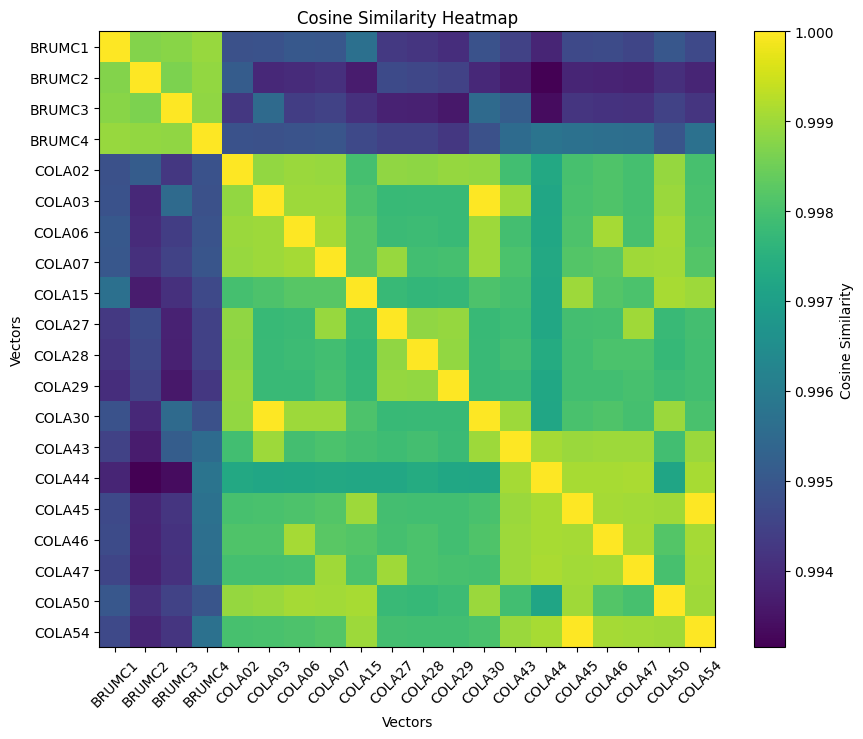

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(cosine_correlation_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Cosine Similarity')
plt.title('Cosine Similarity Heatmap')
plt.xlabel('Vectors')
plt.ylabel('Vectors')
plt.xticks(np.arange(len(first_20_names)), first_20_names, rotation=45)
plt.yticks(np.arange(len(first_20_names)), first_20_names)
plt.show()
